## **Data Understading**

In [1]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878) 
  
# data (as pandas dataframes) 
X = cirrhosis_patient_survival_prediction.data.features 
y = cirrhosis_patient_survival_prediction.data.targets 
  
# metadata 
print(cirrhosis_patient_survival_prediction.metadata) 
  
# variable information 
print(cirrhosis_patient_survival_prediction.variables) 


{'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'ID': 296, 'type'

In [3]:
print("\nBeberapa baris pertama dari fitur (X):")
print(X.head())

print("\nBeberapa baris pertama dari target (y):")
print(y.head())


Beberapa baris pertama dari fitur (X):
              Drug    Age Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  \
0  D-penicillamine  21464   F       Y            Y       Y     Y       14.5   
1  D-penicillamine  20617   F       N            Y       Y     N        1.1   
2  D-penicillamine  25594   M       N            N       N     S        1.4   
3  D-penicillamine  19994   F       N            Y       Y     S        1.8   
4          Placebo  13918   F       N            Y       Y     N        3.4   

  Cholesterol  Albumin Copper  Alk_Phos    SGOT Tryglicerides Platelets  \
0         261     2.60    156    1718.0  137.95           172       190   
1         302     4.14     54    7394.8  113.52            88       221   
2         176     3.48    210     516.0   96.10            55       151   
3         244     2.54     64    6121.8   60.63            92       183   
4         279     3.53    143     671.0  113.15            72       136   

   Prothrombin  Stage  
0         

In [4]:
# Cek missing values di fitur
print("\nJumlah missing values per fitur:")
print(X.isnull().sum())

# Cek missing values di target
print("\nJumlah missing values di target:")
print(y.isnull().sum())



Jumlah missing values per fitur:
Drug             105
Age                0
Sex                0
Ascites          105
Hepatomegaly     105
Spiders          105
Edema              0
Bilirubin          0
Cholesterol      106
Albumin            0
Copper           106
Alk_Phos         106
SGOT             106
Tryglicerides    106
Platelets          7
Prothrombin        2
Stage              6
dtype: int64

Jumlah missing values di target:
Status    0
dtype: int64


## Tipe Data Perkolom

In [5]:
print("\nTipe data setiap fitur:")
print(X.dtypes)



Tipe data setiap fitur:
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol       object
Albumin          float64
Copper            object
Alk_Phos         float64
SGOT             float64
Tryglicerides     object
Platelets         object
Prothrombin      float64
Stage            float64
dtype: object


## Jenis Nilai Setiap Kolom

In [6]:
# Ambil fitur kategorikal
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Tampilkan nilai unik tiap fitur kategorikal
for col in categorical_features:
    print(f"\nNilai unik pada fitur '{col}':")
    print(X[col].unique())



Nilai unik pada fitur 'Drug':
['D-penicillamine' 'Placebo' 'NaNN' nan]

Nilai unik pada fitur 'Sex':
['F' 'M']

Nilai unik pada fitur 'Ascites':
['Y' 'N' 'NaNN' nan]

Nilai unik pada fitur 'Hepatomegaly':
['Y' 'N' 'NaNN' nan]

Nilai unik pada fitur 'Spiders':
['Y' 'N' 'NaNN' nan]

Nilai unik pada fitur 'Edema':
['Y' 'N' 'S']

Nilai unik pada fitur 'Cholesterol':
['261' '302' '176' '244' '279' '248' '322' '280' '562' '200' '259' '236'
 '281' 'NaNN' '231' '204' '274' '178' '235' '374' '252' '271' '395' '456'
 '298' '1128' '175' '222' '370' '260' '296' '262' '210' '364' '314' '172'
 '334' '383' '282' '361' '299' '482' '316' '257' '276' '614' '288' '416'
 '498' '242' '329' '604' '216' '932' '373' '256' '427' '466' '174' '652'
 '258' '320' '132' '558' '674' '394' '436' '315' '247' '448' '472' '250'
 '263' '1600' '345' '408' '660' '325' '206' '353' '201' '420' '239' '460'
 '400' '188' '303' '464' '212' '127' '120' '486' '528' '267' '458' '950'
 '390' '636' '151' '251' '269' '268' '1775' '33

In [7]:
# Ambil nama-nama kolom numerik dan kategorikal
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include='object').columns.tolist()

print("Fitur numerik:", num_features)
print("Fitur kategorikal:", cat_features)


Fitur numerik: ['Age', 'Bilirubin', 'Albumin', 'Alk_Phos', 'SGOT', 'Prothrombin', 'Stage']
Fitur kategorikal: ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Cholesterol', 'Copper', 'Tryglicerides', 'Platelets']


## **Data Preprosesing**

In [8]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [9]:
# Cari missing values di fitur numerik lalu ganti dengan mean
num_imputer = SimpleImputer(strategy='mean')
X_num_imputed = pd.DataFrame(num_imputer.fit_transform(X[num_features]), columns=num_features)

# Cek missing values  di fitur kategorikal lalu ganti dengan modus
cat_imputer = SimpleImputer(strategy='most_frequent')
X_cat_imputed = pd.DataFrame(cat_imputer.fit_transform(X[cat_features]), columns=cat_features)



In [10]:
# Proses gabungan fitur numerik dan kategorikal setelah mengganti missing values
X_imputed = pd.concat([X_num_imputed, X_cat_imputed], axis=1)
print(X_imputed.head())

       Age  Bilirubin  Albumin  Alk_Phos    SGOT  Prothrombin  Stage  \
0  21464.0       14.5     2.60    1718.0  137.95         12.2    4.0   
1  20617.0        1.1     4.14    7394.8  113.52         10.6    3.0   
2  25594.0        1.4     3.48     516.0   96.10         12.0    4.0   
3  19994.0        1.8     2.54    6121.8   60.63         10.3    4.0   
4  13918.0        3.4     3.53     671.0  113.15         10.9    3.0   

              Drug Sex Ascites Hepatomegaly Spiders Edema Cholesterol Copper  \
0  D-penicillamine   F       Y            Y       Y     Y         261    156   
1  D-penicillamine   F       N            Y       Y     N         302     54   
2  D-penicillamine   M       N            N       N     S         176    210   
3  D-penicillamine   F       N            Y       Y     S         244     64   
4          Placebo   F       N            Y       Y     N         279    143   

  Tryglicerides Platelets  
0           172       190  
1            88       221  
2 

In [11]:
# Cek missing values di fitur
print("\nJumlah missing values per fitur:")
print(X_imputed.isnull().sum())



Jumlah missing values per fitur:
Age              0
Bilirubin        0
Albumin          0
Alk_Phos         0
SGOT             0
Prothrombin      0
Stage            0
Drug             0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Cholesterol      0
Copper           0
Tryglicerides    0
Platelets        0
dtype: int64


In [12]:
# Standarisasi fitur numerik (digunakan untuk normalisasi yang nanti nilainya akan berada di antara 0 dan 1)
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num_imputed), columns=num_features)

# Standarisasi fitur kategorikal (menggunakan OneHotEncoder untuk mengubah kategori menjadi representasi numerik)
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat_encoded = pd.DataFrame(encoder.fit_transform(X_cat_imputed), columns=encoder.get_feature_names_out(cat_features))

In [13]:
# Proses gabungan fitur numerik dan kategorikal (Sesudah Strandarisasi)
X_processed = pd.concat([X_num_scaled, X_cat_encoded], axis=1)
print(X_processed.head())


        Age  Bilirubin   Albumin  Alk_Phos      SGOT  Prothrombin     Stage  \
0  0.768941   2.562152 -2.114296 -0.143350  0.314753     1.441846  1.115596   
1  0.546706  -0.481759  1.513818  2.931464 -0.184766    -0.129360 -0.027751   
2  1.852567  -0.413611 -0.041088 -0.794408 -0.540952     1.245445  1.115596   
3  0.383244  -0.322748 -2.255651  2.241950 -1.266205    -0.423961  1.115596   
4 -1.210972   0.040704  0.076708 -0.710453 -0.192331     0.165241 -0.027751   

   Drug_D-penicillamine  Drug_NaNN  Drug_Placebo  ...  Platelets_721  \
0                   1.0        0.0           0.0  ...            0.0   
1                   1.0        0.0           0.0  ...            0.0   
2                   1.0        0.0           0.0  ...            0.0   
3                   1.0        0.0           0.0  ...            0.0   
4                   0.0        0.0           1.0  ...            0.0   

   Platelets_76  Platelets_79  Platelets_80  Platelets_81  Platelets_88  \
0           0.0  

## **Modeling**

In [14]:
from sklearn.model_selection import train_test_split

# Pastikan target numerik
y_encoded = y[y.columns[0]].astype('category').cat.codes

# Bagi data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)


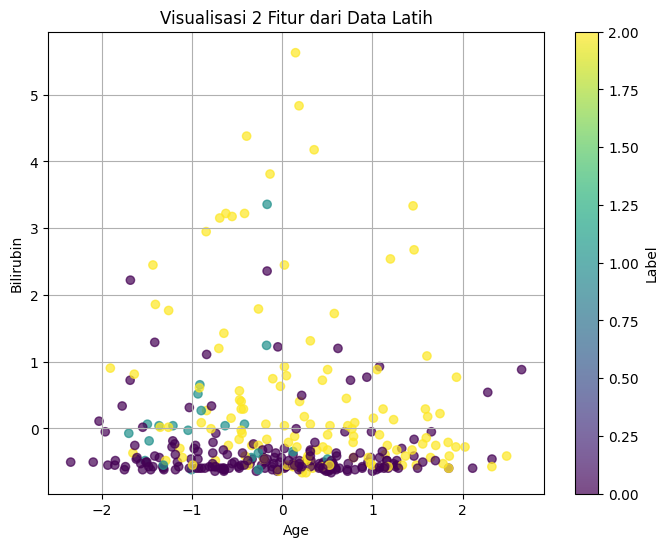

In [15]:
import matplotlib.pyplot as plt

# Ambil 2 fitur pertama dari data latih (asumsi X_train adalah DataFrame)
feature_1 = X_train.iloc[:, 0]
feature_2 = X_train.iloc[:, 1]

# Buat scatter plot berdasarkan label (y_train)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(feature_1, feature_2, c=y_train, cmap='viridis', alpha=0.7)
plt.title("Visualisasi 2 Fitur dari Data Latih")
plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[1])
plt.colorbar(scatter, label='Label')
plt.grid(True)
plt.show()


In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

# Latih model dengan data latih
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prediksi data uji
y_pred = knn.predict(X_test)

# Evaluasi akurasi
print("Akurasi:", accuracy_score(y_test, y_pred))

# Laporan klasifikasi lengkap
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Akurasi: 0.6785714285714286

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.82      0.73        44
           1       0.00      0.00      0.00         4
           2       0.70      0.58      0.64        36

    accuracy                           0.68        84
   macro avg       0.46      0.47      0.46        84
weighted avg       0.65      0.68      0.66        84


Confusion Matrix:
[[36  0  8]
 [ 3  0  1]
 [15  0 21]]


C:\Users\MyBook Z Series\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MyBook Z Series\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MyBook Z Series\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages

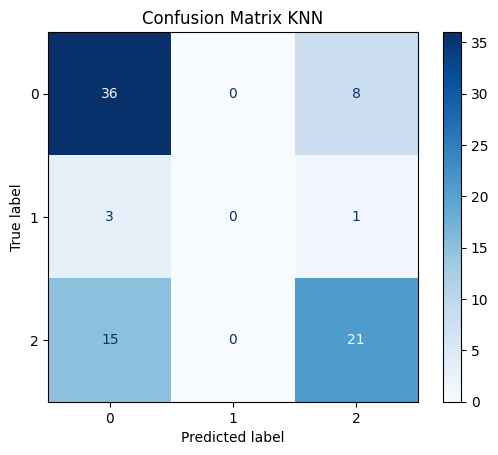

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix KNN")
plt.show()
